## 🖼️ **CIFAR-10 Image Classification**

## 📌 **Introduction**
The CIFAR-10 dataset consists of **60,000 tiny color images (32x32 pixels)** across **10 object categories**, including airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.  
Image classification is a **core task in computer vision**, helping machines understand and recognize visual information.

This project focuses on:
- Building a **Basic Convolutional Neural Network (CNN)** for image classification.  
- Designing an **Enhanced CNN** with Dropout, Batch Normalization, and Data Augmentation for better generalization.  
- Comparing both models using **accuracy, precision, recall, F1-score, and confusion matrices**.  
- Visualizing **training curves and sample predictions**.

---

## 🎯 **Objectives**
- Perform **data loading and preprocessing** on CIFAR-10 images.  
- Train a **Basic CNN** and evaluate its performance.  
- Develop an **Enhanced CNN** with additional techniques for improved accuracy.  
- Compare **performance metrics** of both models.  
- Visualize **training results and predictions** for better understanding.  


-------------

### **Importing required libraries**

_run this command if you do NOT have these libraries installed_
```bash
pip install -r requirements.txt
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore') #disabling warnings

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

> ## **_NOTE:_** 

_The model training takes a lot of time so I'm using GPU aaceleration.For my RTX 4060, the configureations are:_
- Python 3.9
- Tensorflow 2.10.0
- CUDA 11.8
- CudNN 8.1 

In [4]:
tf.config.list_physical_devices('GPU')  #checking if tensorflow is working with GPU 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.__version__

'2.10.0'

In [6]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data() #Loading the dataset from Keras and splitting

In [7]:
print("Train Images: ", X_train.shape) #50000 training images
print("Train Images: ", X_test.shape) #10000 testing images

Train Images:  (50000, 32, 32, 3)
Train Images:  (10000, 32, 32, 3)


In [8]:
X_train = X_train.astype('float') /255.0 #normalising pixel values between 0 and 1
X_test = X_test.astype('float') /255.0 

In [9]:
classes = 10
y_train = to_categorical(y_train,classes) #One hot encoding target labels
y_test = to_categorical(y_test,classes) #eg. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] = 4th label = 'cat'

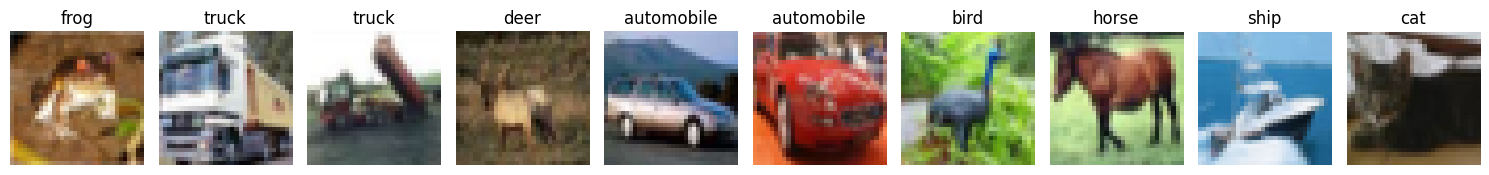

In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] #the order is fixed. changing WILL cause mislabelling 
#visualising training images with labels
plt.figure(figsize=(15,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()    
plt.show()

## **Level 1: Basic CNN**

> *The Basic model just has 2 blocks each with 2 layers of Convulation & a Pooling layer at end of each block. followed by the fully connected layers and output layer*

In [11]:
model1= models.Sequential([

    #Block 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), #acts as input layer 
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #block 2
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'), #fully connected layers
    layers.Dense(10, activation='softmax')
]
)

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history1 = model1.fit(X_train, y_train, epochs=10, 
                    batch_size=64, 
                    validation_split=0.2) #a fixed validation set is choosen from the training data so x_val -> 10000 images from the X_train 

Epoch 1/10
625/625 [==============================] - 11s 11ms/step - loss: 1.5841 - accuracy: 0.4251 - val_loss: 1.2830 - val_accuracy: 0.5419
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 1.1542 - accuracy: 0.5911 - val_loss: 1.0547 - val_accuracy: 0.6343
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.9546 - accuracy: 0.6657 - val_loss: 0.9117 - val_accuracy: 0.6815
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.8213 - accuracy: 0.7103 - val_loss: 0.8601 - val_accuracy: 0.6988
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.7473 - accuracy: 0.7384 - val_loss: 0.7957 - val_accuracy: 0.7250
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.6707 - accuracy: 0.7643 - val_loss: 0.7869 - val_accuracy: 0.7309
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 0.6150 - accuracy: 0.7853 - val_loss: 0.7540 - val_accuracy: 0.7389
Epo

> - *Even after trying different combinations of hyperparameters, the model couldnt score more than 73-74% validation accuracy with  mild overfitting. adding more layers only increased the overfitting* 

## **Level 2: Advanced Model** 

> *The Advanced CNN has an architecture of 4 blocks of layers followed by the fully connected layers. Each block has 2 pairs of a Conv layer and a BatchNormalisation layer. Then a Pooling Layer and a Dropout layer at the end. Instead of Flatten() we used GlobalAveragePooling2D() layer to reduce overfitting and parameters saving time. Then another Dropout layer and the output layer. We also applied other enhancements like Augmentation to enable the model to learn the features from differnet views and we used ModelCheckpoint to save the model with the maximum validation accuracy*

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,zoom_range=0.1)
datagen.fit(X_train)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint 
checkpoint = ModelCheckpoint(filepath="best.h5", save_best_only=True, monitor='val_accuracy', mode='max') #save the model with the best val_accuracy

In [18]:
from tensorflow.keras.layers import BatchNormalization, Dropout
model2= models.Sequential([

    #block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(), #normalizes activations
    layers.Conv2D(32,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.25), #randomly 25% of the activations from filters are silenced

    #block 2
    layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.3),

    #block 3
    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.4),

    #block 4
    layers.Conv2D(256,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(256,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.45),
    
    #fully connected layers
    layers.GlobalAveragePooling2D(), #returns avg of values from each feature map to reduce total parameters
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
]
)

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [20]:
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
history2 = model2.fit(X_train, y_train, batch_size=64, 
                    epochs=25, 
                    validation_split=0.2,
                    callbacks=[checkpoint])

Epoch 1/25
625/625 [==============================] - 13s 19ms/step - loss: 1.7397 - accuracy: 0.3695 - val_loss: 1.3452 - val_accuracy: 0.5194
Epoch 2/25
625/625 [==============================] - 11s 17ms/step - loss: 1.2873 - accuracy: 0.5459 - val_loss: 1.1035 - val_accuracy: 0.6042
Epoch 3/25
625/625 [==============================] - 11s 18ms/step - loss: 1.0821 - accuracy: 0.6247 - val_loss: 0.9308 - val_accuracy: 0.6703
Epoch 4/25
625/625 [==============================] - 11s 17ms/step - loss: 0.9282 - accuracy: 0.6844 - val_loss: 0.9041 - val_accuracy: 0.6817
Epoch 5/25
625/625 [==============================] - 11s 17ms/step - loss: 0.8324 - accuracy: 0.7183 - val_loss: 0.8354 - val_accuracy: 0.7204
Epoch 6/25
625/625 [==============================] - 11s 17ms/step - loss: 0.7595 - accuracy: 0.7441 - val_loss: 0.6785 - val_accuracy: 0.7690
Epoch 7/25
625/625 [==============================] - 11s 18ms/step - loss: 0.6990 - accuracy: 0.7660 - val_loss: 0.6920 - val_accuracy:

> - *After enhancing the basic CNN, the model could reach validation accuracy near 84-85% and no overfitting with increased training time. This is a major buff in performance than the basic CNN.*

## **Visualising training**

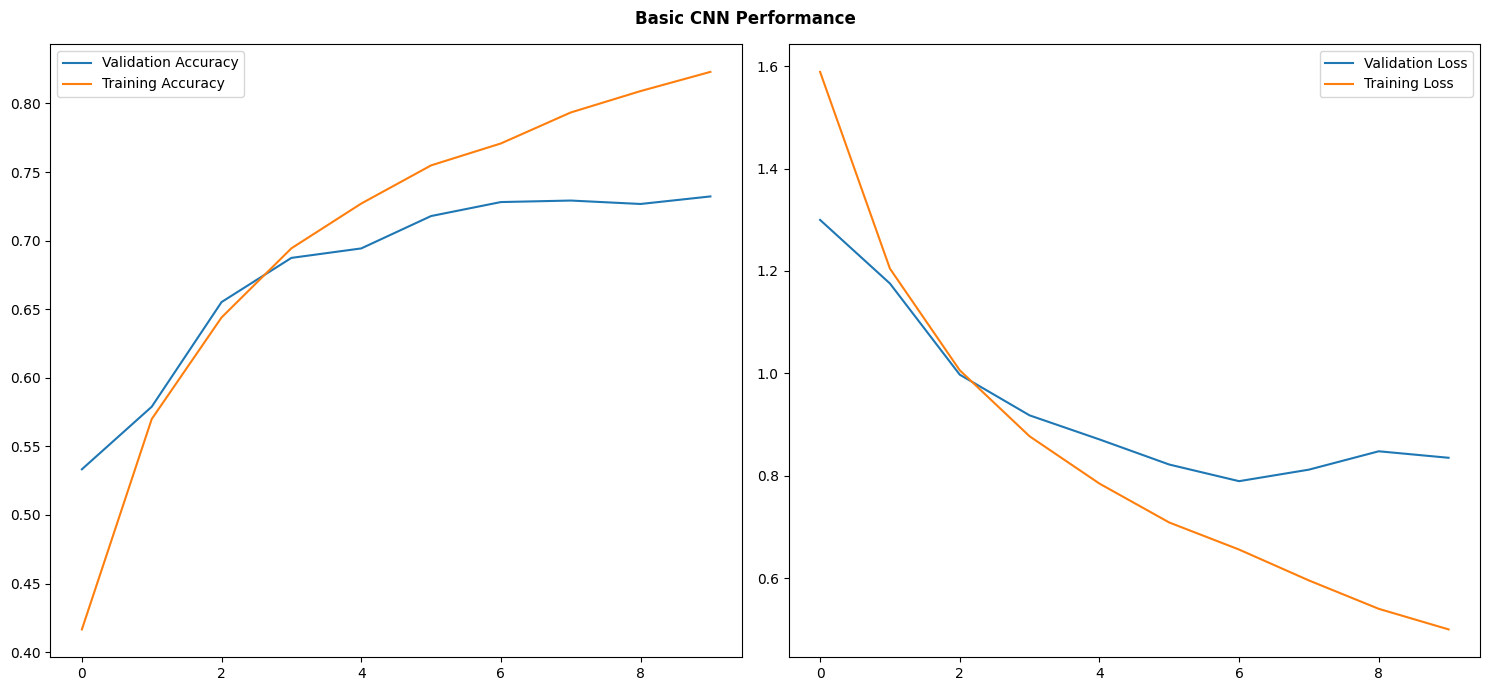

In [81]:
#plotting the recorded accuracies
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history1.history['accuracy'], label="Training Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.plot(history1.history['loss'], label="Training Loss")
plt.suptitle("Basic CNN Performance", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

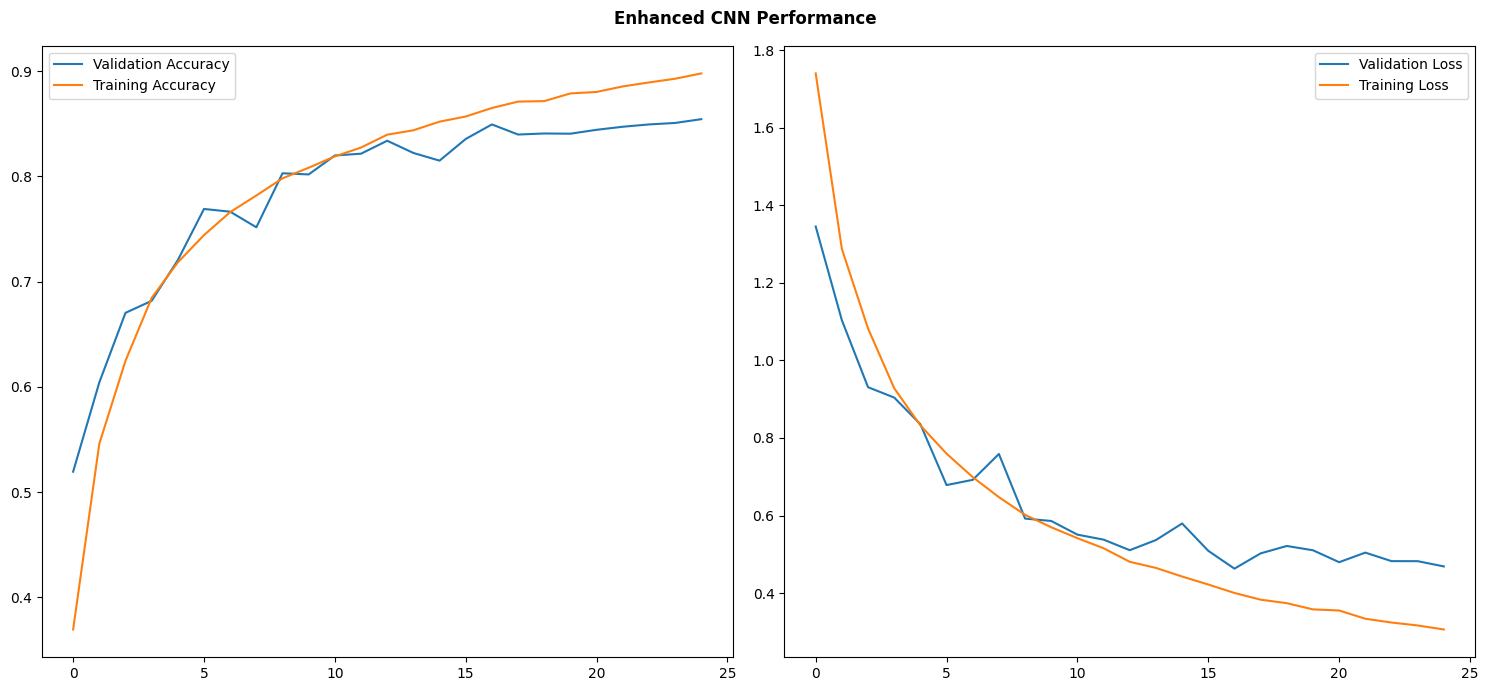

In [82]:
#plotting recorded losses 
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history2.history['accuracy'], label="Training Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['loss'], label="Training Loss")
plt.suptitle("Enhanced CNN Performance", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

## **Evaluation & Prediction**

In [21]:
model2.load_weights("best.h5") #loading the weights of the best saved model in the memory

In [22]:
loss1, acc1= model1.evaluate(X_test, y_test) #evaluating the models on test set
loss2, acc2= model2.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4777 - accuracy: 0.8486


In [23]:
pred1 = model1.predict(X_test) #getting the array of predictions on test set
pred1 = np.argmax(pred1, axis=1) #getting the index values of the prediction array for each prediction

313/313 [==============================] - 1s 3ms/step


In [24]:
pred2 = model2.predict(X_test)
pred2 = np.argmax(pred2, axis=1) 

313/313 [==============================] - 2s 6ms/step


In [25]:
true_labels = [class_names[i] for i in np.argmax(y_test[:10], axis=1)] #getting the true labels from the classes array for the first 10 test images 

In [26]:
pred1_labels = [class_names[i] for i in pred1[:10]] #getting the class names of the first 10 predictions
pred2_labels = [class_names[i] for i in pred2[:10]]

In [27]:
import pandas as pd
cmp = pd.DataFrame({'True Labels': true_labels, 'Basic': pred1_labels, 'Advanced': pred2_labels}) #creating a table view to compare the predictions using labels

In [28]:
cmp

,True Labels,Basic,Advanced
0,cat,cat,cat
1,ship,automobile,ship
2,ship,automobile,ship
3,airplane,airplane,airplane
4,frog,frog,frog
5,frog,frog,frog
6,automobile,automobile,automobile
7,frog,frog,frog
8,cat,cat,cat
9,automobile,automobile,automobile


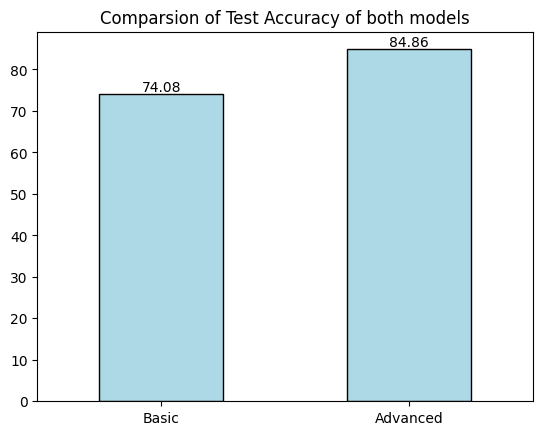

In [29]:
accuracies = pd.Series({'Basic': acc1*100, 'Advanced': acc2*100})
ax = accuracies.plot(kind='bar', color='lightblue', edgecolor='black') #visual comparison of test accuracies of both models
plt.xticks(rotation=0)
plt.title("Comparsion of Test Accuracy of both models")
plt.bar_label(ax.containers[0],fmt='%.2f')
plt.show()

In [45]:
all_true_labels = [class_names[i] for i in np.argmax(y_test, axis=1)] 
all_pred1_labels = [class_names[i] for i in pred1]
all_pred2_labels = [class_names[i] for i in pred2]

In [70]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
cm1 = confusion_matrix(all_true_labels, all_pred1_labels)
cm2 = confusion_matrix(all_true_labels, all_pred2_labels)

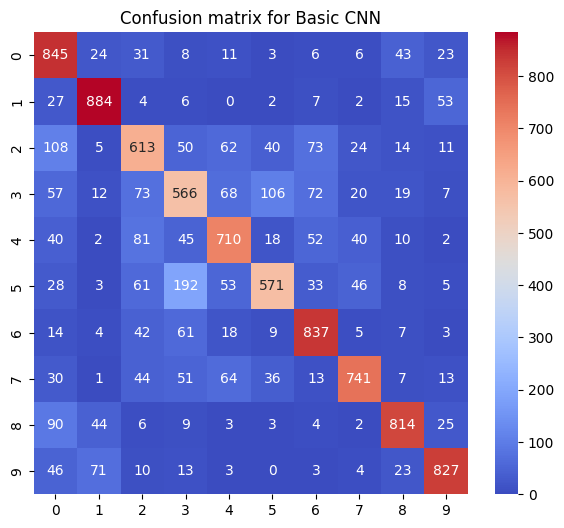

In [76]:
import seaborn as sns
plt.figure(figsize=(7,6))
sns.heatmap(cm1, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Confusion matrix for Basic CNN")
plt.show()

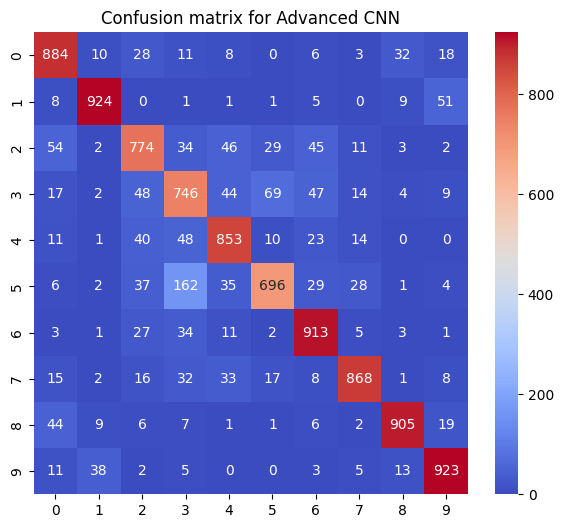

In [75]:
plt.figure(figsize=(7,6))
sns.heatmap(cm2, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Confusion matrix for Advanced CNN")
plt.show()

In [81]:
print("Basic Model precision: ",precision_score(all_true_labels, all_pred1_labels, average="macro"))
print("Advanced Model precision: ",precision_score(all_true_labels, all_pred2_labels, average="macro"))

Basic Model precision:  0.7435372331972235
Advanced Model precision:  0.8503211372240725


In [83]:
print("Basic Model precision: ",recall_score(all_true_labels, all_pred1_labels, average="macro"))
print("Advamced Model precision: ",recall_score(all_true_labels, all_pred2_labels, average="macro"))

Basic Model precision:  0.7407999999999999
Advamced Model precision:  0.8486


In [84]:
print("Basic Model precision: ",f1_score(all_true_labels, all_pred1_labels, average="macro"))
print("Advamced Model precision: ",f1_score(all_true_labels, all_pred2_labels, average="macro"))

Basic Model precision:  0.7395137135318856
Advamced Model precision:  0.848305527121774


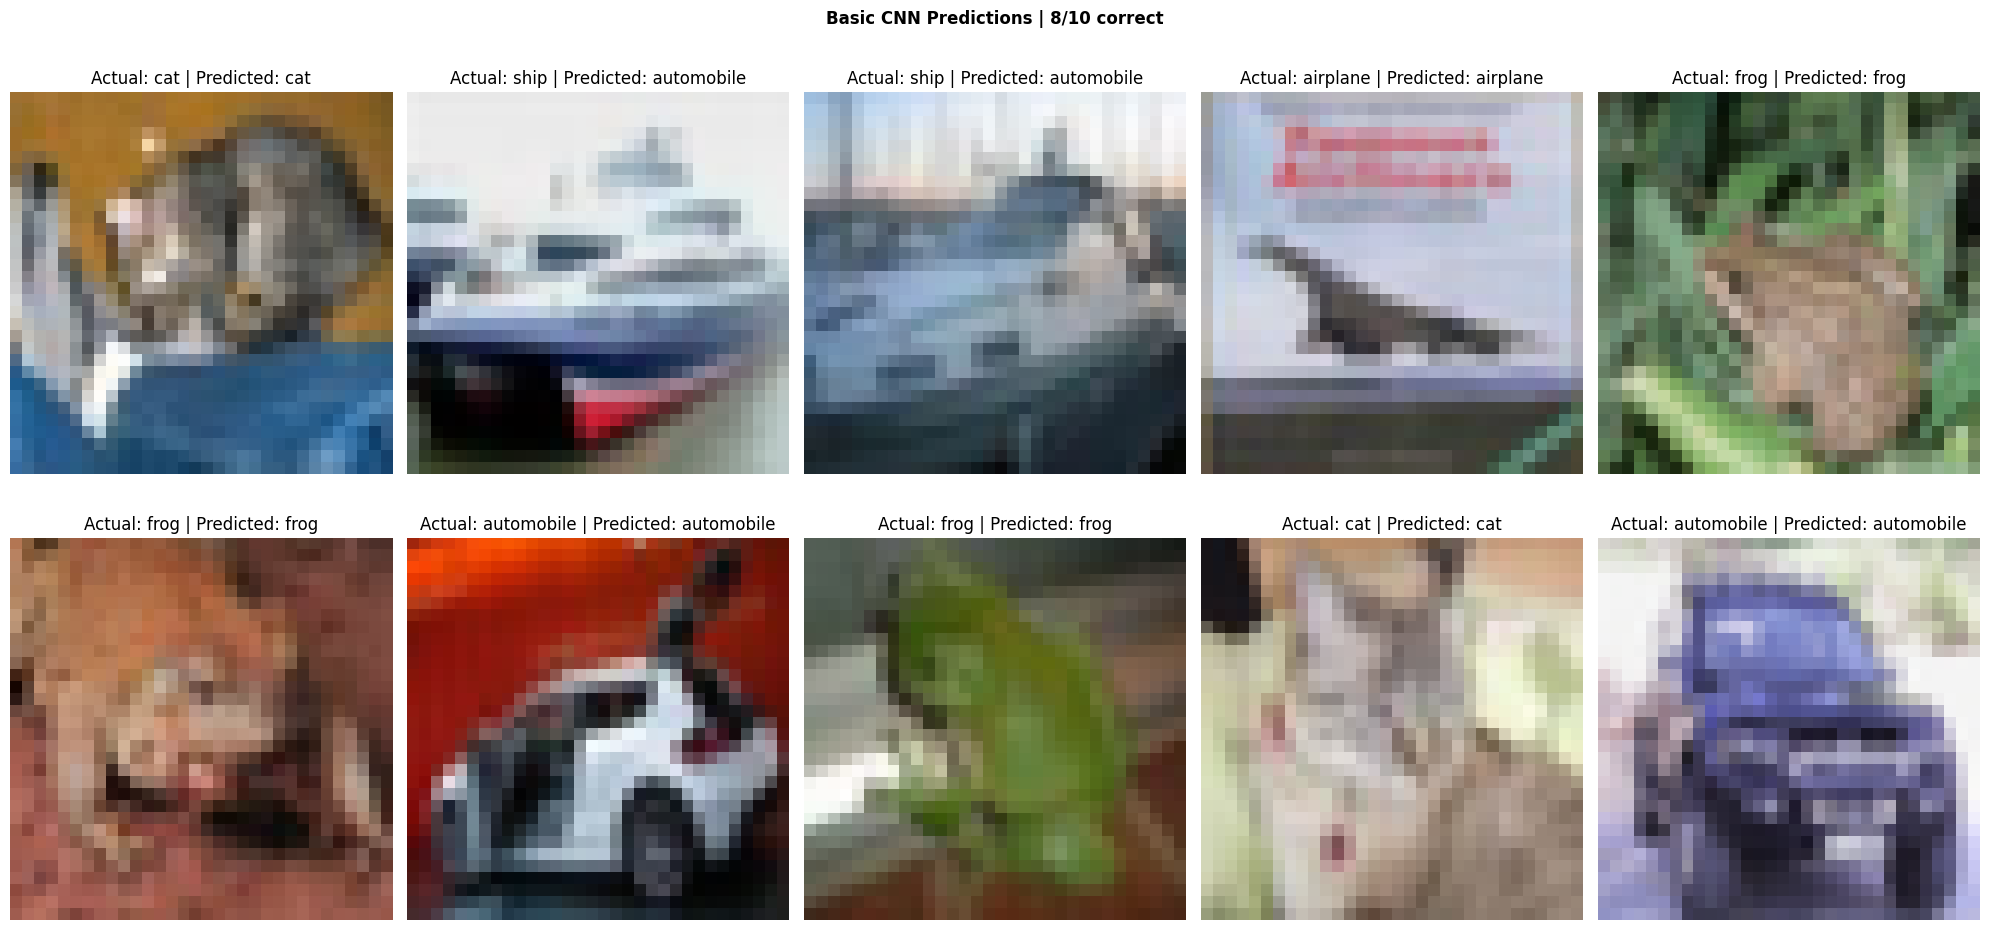

In [31]:
correct_label = [i is j for i,j in zip(pred1_labels, true_labels)].count(True) #getting count of how many predictions were correct
plt.figure(figsize=(20,10)) #visualising the Actual label vs predicted label with the test images
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {true_labels[i]} | Predicted: {pred1_labels[i]}")
    plt.axis(False)

plt.suptitle(f"Basic CNN Predictions | {correct_label}/10 correct", fontweight='bold')
plt.tight_layout()
plt.show()

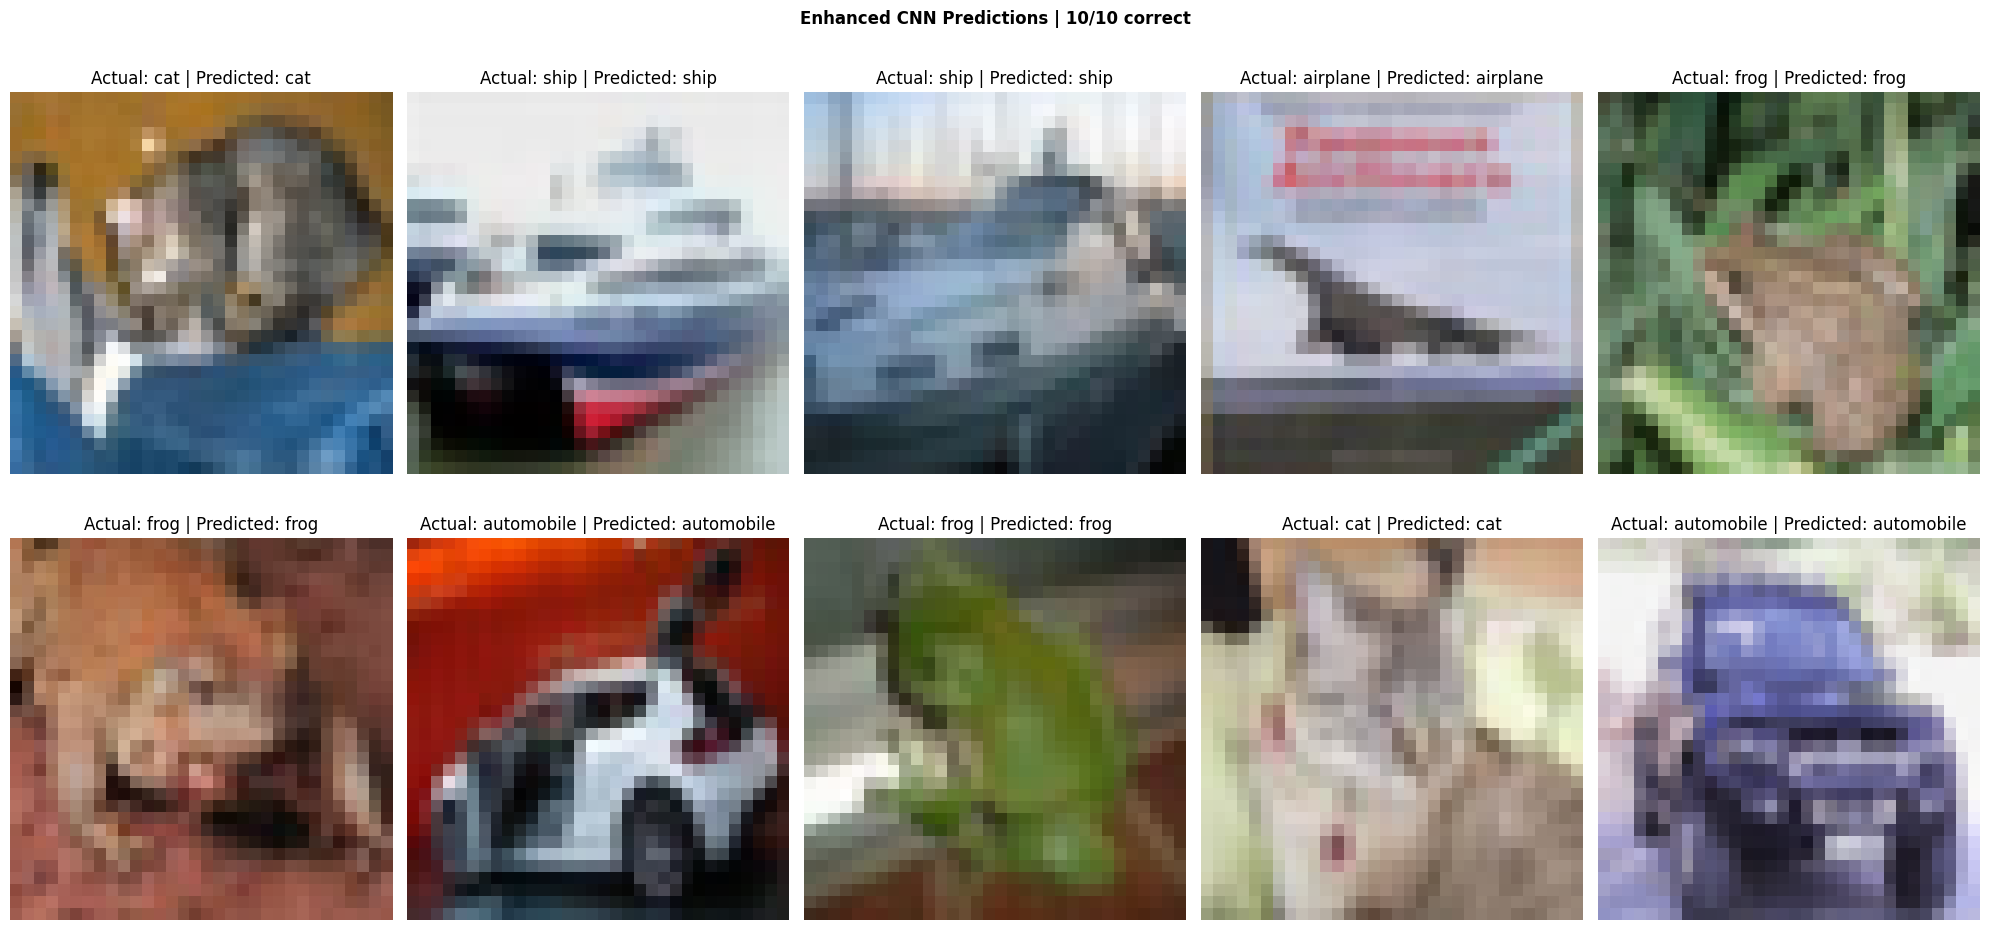

In [32]:
correct_label = [i is j for i,j in zip(pred2_labels, true_labels)].count(True)
plt.figure(figsize=(20,10)) #visualising the Actual label vs predicted label with the test images
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {true_labels[i]} | Predicted: {pred2_labels[i]}")
    plt.axis(False)

plt.suptitle(f"Enhanced CNN Predictions | {correct_label}/10 correct", fontweight='bold')
plt.tight_layout()
plt.show()

## **Testing on Real data**

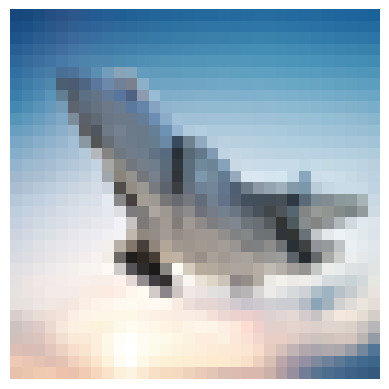

In [33]:
from PIL import Image
test = "test_data/airplane.jpg" #an image of F-35 fighter jet I downloaded from the web. unknown to the model
img = Image.open(test) #reading image
img = img.resize((32, 32)) #resizing to match the input shape of the model
plt.imshow(img) #displaying the resized image
plt.axis(False)
plt.show()

In [34]:
img_data = np.array(img) /255.0 #normalising the pixel values to match the training values of the model 
img_data= np.expand_dims(img_data, axis=0) #adds an additional dimesnion at axis 0(first element in the image shape) that acts as the batch size. output: (1, 32,32, 3)

In [35]:
pred = model1.predict(img_data) #predict the image
pred_label = class_names[np.argmax(pred, axis=1)[0]] #get label
pred_label

1/1 [==============================] - 0s 394ms/step


'airplane'

In [36]:
pred = model2.predict(img_data) #predict the image
pred_label = class_names[np.argmax(pred, axis=1)[0]] #get label
pred_label

1/1 [==============================] - 0s 213ms/step


'airplane'

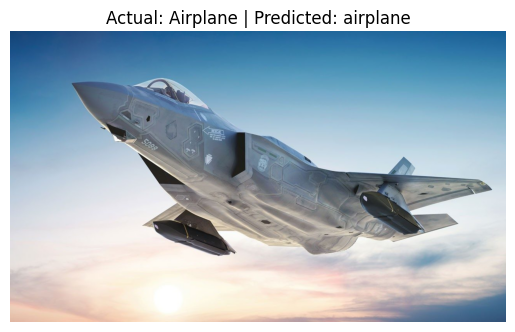

In [37]:
img = Image.open(test)
plt.imshow(img)
plt.title(f"Actual: Airplane | Predicted: {pred_label}")
plt.axis(False)
plt.show()

> *In conclusion, while a simple CNN demonstrates the core idea of deep learning in image classification, an enhanced CNN with dropout, batch normalization, and data augmentation provides a more robust and accurate solution. This highlights the importance of architectural improvements and training strategies in achieving state-of-the-art results.*

_If you have any suggestions to imporve the forecasting or any other improvements or corrections, feel free to contact me !_

## **Author**
**Rehan Abdul Gani Shaikh** 

📧 [LinkedIn](www.linkedin.com/in/rehan-shaikh-68153a246)

🔗 Email: rehansk.3107@gmail.com